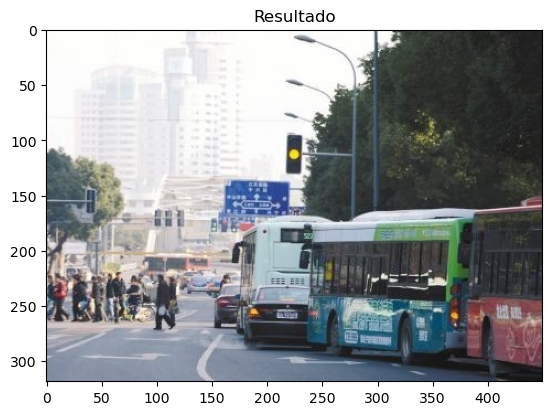

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detector(archivo):
    img = cv2.imread(archivo)
    cimg = np.copy(img)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    #Rangos de los colores rojo, verde y amarillo
    rojo_bajo1 = np.array([0,100,100])
    rojo_alto1 = np.array([10,255,255])
    rojo_bajo2 = np.array([160,100,100])
    rojo_alto2 = np.array([180,255,255])

    verde_bajo = np.array([40,50,50])
    verde_alto = np.array([90,255,255])

    amarillo_bajo = np.array([15,150,150])
    amarillo_alto = np.array([35,255,255])

    #Creación de las mascáras  
    mask1 = cv2.inRange(img_hsv, rojo_bajo1,   rojo_alto1)
    mask2 = cv2.inRange(img_hsv, rojo_bajo2,   rojo_alto2)
    mask_r = cv2.add(mask1, mask2) #combinamos las dos mascáras del color rojo
    mask_v = cv2.inRange(img_hsv, verde_bajo,  verde_alto)
    mask_a = cv2.inRange(img_hsv, amarillo_bajo, amarillo_alto)

    tamaño = img.shape

    #Utilizamos la función cv2.HoughCircles para detectar círculos en las imágenes binarias (mascáras)
    r_circulos = cv2.HoughCircles(mask_r, cv2.HOUGH_GRADIENT, 1, 80,
                                 param1=50, param2=10, minRadius=10, maxRadius=100)

    v_circulos = cv2.HoughCircles(mask_v, cv2.HOUGH_GRADIENT, 1, 60,
                                 param1=50, param2=10, minRadius=10, maxRadius=100)

    a_circulos = cv2.HoughCircles(mask_a, cv2.HOUGH_GRADIENT, 1, 30,
                                 param1=50, param2=5, minRadius=10, maxRadius=100)
    
    r = 5
    limite = 7.7 / 10
    fuente = cv2.FONT_HERSHEY_SIMPLEX

    #Clasificación de los circulos 
    if r_circulos is not None:
        #Se redondean las coordenadas de los círculos detectados y se convierten a un tipo de dato entero
        r_circulos = np.uint16(np.around(r_circulos))
        #Se itera sobre los círculos detectados
        for i in r_circulos[0, :]:
            #Se verifica que el círculo no esté fuera de los límites definidos
            if i[0] > tamaño[1] or i[1] > tamaño[0] or i[1] > tamaño[0] * limite:
                continue
            #
            h, s = 0.0, 0.0
            for m in range(-r, r):
                for n in range(-r, r):
                    if (i[1] + m) >= tamaño[0] or (i[0] + n) >= tamaño[1]:
                        continue
                    h += mask_r[i[1] + m, i[0] + n]
                    s += 1
            if h / s > 50:
                cv2.circle(cimg, (i[0], i[1]), i[2] + 10, (0, 255, 0), 2)
                cv2.circle(mask_r, (i[0], i[1]), i[2] + 30, (255, 255, 255), 2)
                cv2.putText(cimg, 'ROJO', (i[0], i[1]),
                            fuente, 1, (255, 0, 0), 2, cv2.LINE_AA)
            break 

    if v_circulos is not None:
        v_circulos = np.uint16(np.around(v_circulos))
        for i in v_circulos[0, :]:
            if i[0] > tamaño[1] or i[1] > tamaño[0] or i[1] > tamaño[0] * limite:
                continue
            h, s = 0.0, 0.0
            for m in range(-r, r):
                for n in range(-r, r):
                    if (i[1] + m) >= tamaño[0] or (i[0] + n) >= tamaño[1]:
                        continue
                    h += mask_v[i[1] + m, i[0] + n]
                    s += 1
            if h / s > 100:
                cv2.circle(cimg, (i[0], i[1]), i[2] + 10, (0, 255, 0), 2)
                cv2.circle(mask_v, (i[0], i[1]), i[2] + 30, (255, 255, 255), 2)
                cv2.putText(cimg, 'VERDE',
                            (i[0], i[1]), fuente, 1, (255, 0, 0), 2, cv2.LINE_AA)
            break
    
    if a_circulos is not None:
        a_circulos = np.uint16(np.around(a_circulos))
        for i in a_circulos[0, :]:
            if i[0] > tamaño[1] or i[1] > tamaño[0] or i[1] > tamaño[0] * limite:
                continue
            h, s = 0.0, 0.0
            for m in range(-r, r):
                for n in range(-r, r):
                    if (i[1] + m) >= tamaño[0] or (i[0] + n) >= tamaño[1]:
                        continue
                    h += mask_a[i[1] + m, i[0] + n]
                    s += 1
            if h / s > 50:
                cv2.circle(cimg, (i[0], i[1]), i[2] + 10, (0, 255, 0), 2)
                cv2.circle(mask_a, (i[0], i[1]), i[2] + 30, (255, 255, 255), 2)
                cv2.putText(cimg, 'AMARILLO',
                            (i[0], i[1]), fuente, 1, (255, 0, 0), 2, cv2.LINE_AA)
            break

    plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
    plt.title('Resultado')
    plt.show()

# Ruta al archivo de ejemplo
archivo = '20.jpg'
detector(archivo)